# Exercise 1
# Exploring Earth System Model Ensembles

* **Description**: Reads in netcdf files of CESM1-LE total ice area, NSIDC observations, and makes plots
* **Creator**: Alice DuVivier
* **Date**: March 2025

## Background

We use data from the CESM1 Large Ensemble (Kay et al. 2015), an experiment designed for studying climate change in the presence of internal climate variability. Climate forcing is a factor that changes the climate system and can be caused by natural or human activities. Internal climate variability is unforced climate variability intrinsic to a given climate state. Internal climate variability arises from atmospheric, oceanic, land, and cryospheric processes and their coupled interactions. Internal climate variability has important effects on climate change projections, yet internal climate variability is often confused with model error.

The CESM1-LE includes a 40-member initial condition ensemble covering the period 1920-2100. The 40-member ensemble uses 1920-2005 historical radiative forcing and 2006-2100 RCP8.5 radiative forcing. Ensemble spread is generated using round-off differences ($10^{-14}$K) in the initial atmospheric temperature field. Because the members use the same physics and have the same external forcing, ensemble members differ only due to internal climate variability. 

We examine the total sea ice area (TIA), or the spatial (2D) coverage of sea ice over the Arctic Ocean (units = $km^{2}$).

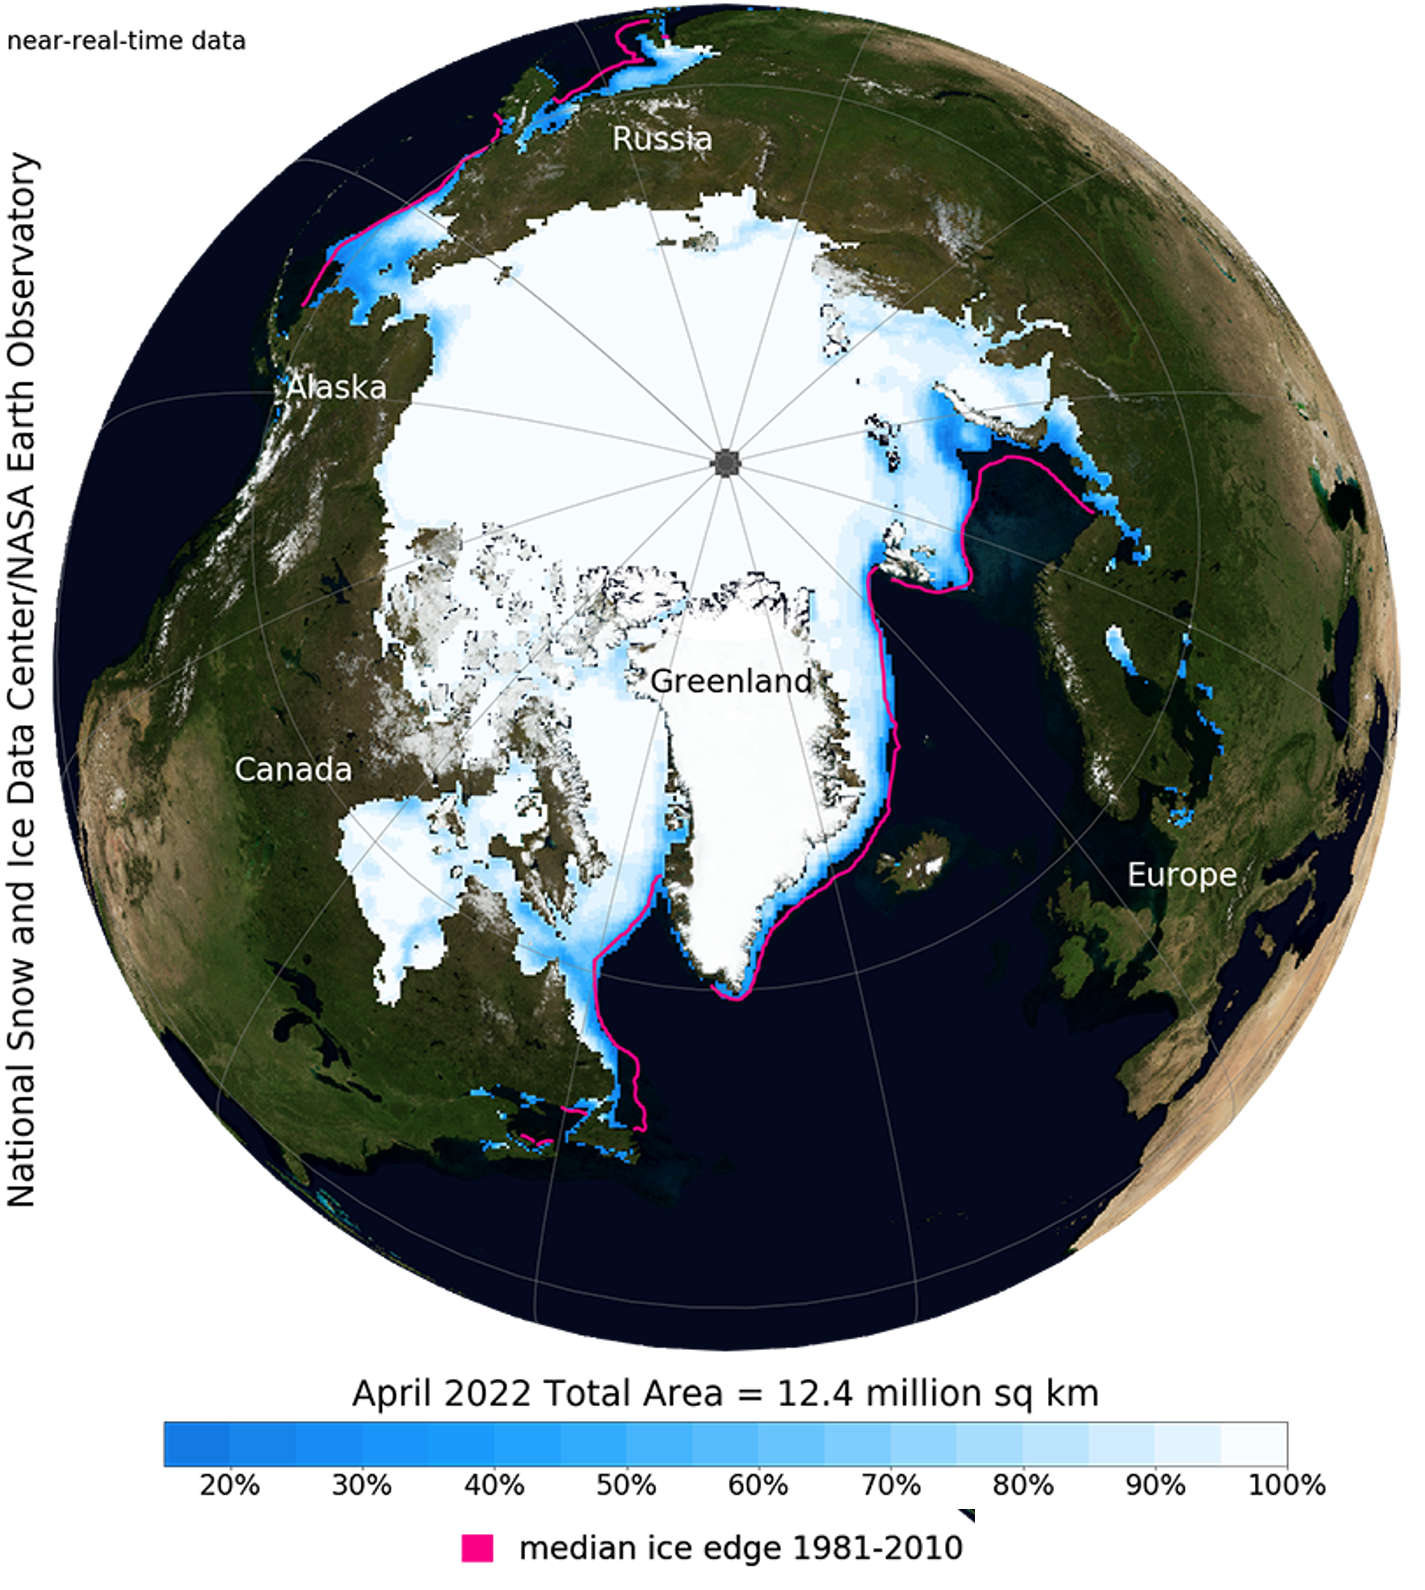

In each grid cell, we know the area and the total sea ice concentration (SIC) and by multiplying these values we can get the total area in each grid cell covered by sea ice. TIA is simply the sum of all the grid cells over the whole Arctic. We calculate TIA as follows:

$$
  TIA = \sum_{all_{-}cells} (Area_{cell} * SIC_{cell})
$$

Note below that 'aice' is the sea ice model CICE's name for SIC in a grid cell, but in this dataset, 'aice' is used to indicate the total ice area.


- Kay et al. 2015. “The Community Earth System Model (CESM) Large Ensemble Project: A Community Resource for Studying Climate Change in the Presence of Internal Climate Variability.” https://doi.org/10.1175/BAMS-D-13-00255.1

In [ ]:
# import python packages we'll need
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and manipulate all the data

In [ ]:
# set data directory
data_dir = 'data/'

## Load CESM1-LE data

In [ ]:
# Set the data to input
fin = 'LE1_aicetot_nh_1920-2100.nc'

# read in the data
ds1 = xr.open_dataset(data_dir + fin)

In [ ]:
# look at data
ds1

### Questions:
- What is the variables are in this data file? How does their structure differ? What might that tell you about the data?
- How many years of data do we have?
- How many ensemble members are there?

## Subset CESM Data
- We want to keep just September data since the trends are largest.

In [ ]:
# keep only September data (note that indexing starts at 0, so September is month 8)
mm = 8
data = ds1.aice_monthly.isel(nmonth=mm)

In [ ]:
# convert data from m^2 to km^2
data = data/(1000.0 * 1000.0)

In [ ]:
# make an array of years to use for plotting later
years_cesm = np.arange(1920,2101,1)

## Load NSIDC satellite Sea ice Index data

- We'll compare the CESM data to the National Snow and Ice Data Center (NSIDC) satellite based sea ice index total sea ice area
- Data: https://nsidc.org/data/g02135/versions/3
- Documentation: https://nsidc.org/sites/default/files/g02135-v003-userguide_1_1.pdf

In [ ]:
# Set the satellite data to input
fin = 'N_09_extent_v3.0.csv'

In [ ]:
# read data in
df = pd.read_csv(data_dir + fin, na_values=["-99.9"], engine="c")

# keep just arrays of the years and sea ice area data
years_obs = df.iloc[:, 0].values
obs_area = df.iloc[:, 5].values

## Fill Satellite Pole Hole
Satellites cannot get full coverage of the north or south poles due to orbital constraints. Below, you can see some tracks of satellites in the Arctic, as well as the data hole from where they can't measure. There is also a satellite pole hole in the Antarctic, but it is not generally large enough to impact sea ice observations.

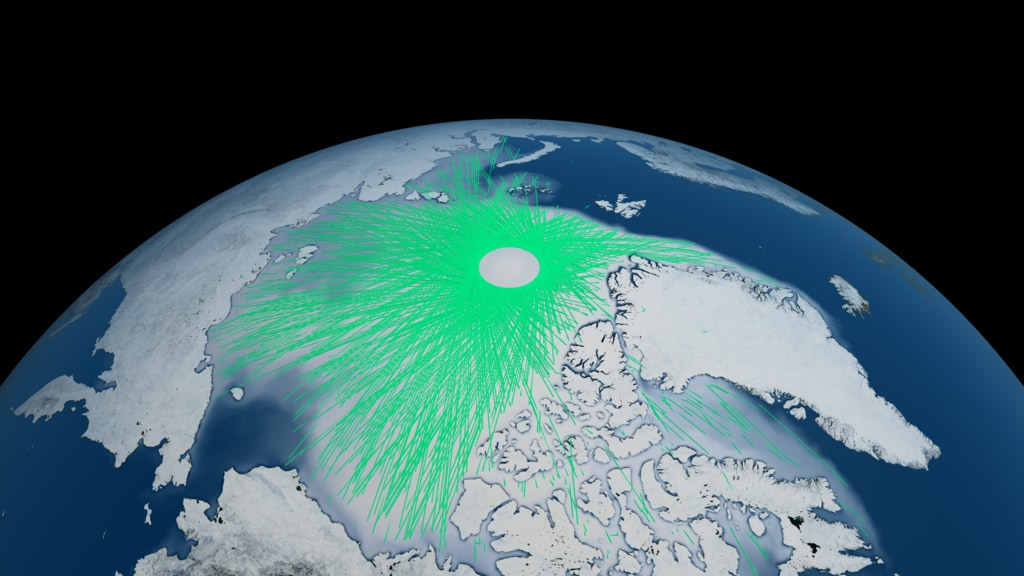

In [ ]:
# NSIDC documentation provies the following information for the pole hole size in the sea ice data. 
# November 1978 through July 1987: 1.19 M km2 (8 yrs)
# August 1987 through December 2007: 0.31 M km2 (21 yrs)
# January 2008 to present: 0.029 M km2 (17 yrs)

# Make a list of these extra areas.
pole_hole = [1.19,1.19,1.19,1.19,1.19,1.19,1.19,1.19,
             0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,
             0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,0.31,
             0.31,
             0.029,0.029,0.029,0.029,0.029,0.029,0.029,0.029,0.029,0.029,
             0.029,0.029,0.029,0.029,0.029,0.029,0.029]

# convert to float
pole_hole = np.array(pole_hole)

In [ ]:
# assume 100% coverage (factor = 1.0)
factor = 1.0

# add pole hole to sea ice area
data_obs = obs_area+(pole_hole*factor)

# convert to km2 from M km2
data_obs = data_obs * 1000000.0

### Questions:
- Do you think it's reasonable to assume 100% coverage in the pole hole in September? What about in 1979? What about now? How might that affect the comparison between the model and observations?

### Notes
- You could test different assumptions of ice concentration in the pole hole by changing the 'factor' value above and then re-plotting figures below.

# Exercise 1
- Activity: Plot two ensemble members from the CESM1-LE

In [ ]:
# choose which ensemble to plot (n = 0 to 37)
n = 13
data_plt_0 = data.isel(n_members=n)
# choose the second ensemble member (n = 0 to 37, not the same as before)
m = 10
data_plt_1 = data.isel(n_members=m)

# hint: 10,13, 18, or 21 are good options

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

# plot model data
plt.plot(years_cesm,data_plt_0,label='Ens_'+str(n),color='royalblue',linewidth=3)
plt.plot(years_cesm,data_plt_1,label='Ens_'+str(m),color='goldenrod',linewidth=3)
# plot obs data
#plt.plot(years_obs,data_obs,label='Obs',color='firebrick',linewidth=3)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1920,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=1);

### Questions:
- How is total Arctic sea ice changing over the 20th and 21st centuries?
- How do the two model timeseries compare?
- How different are these two ensemble members?

# Exercise 2
- Activity: Plot the same two ensemble members from the CESM1-LE and the satellite observations

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

# plot model data
plt.plot(years_cesm,data_plt_0,label='Ens_'+str(n),color='royalblue',linewidth=3)
plt.plot(years_cesm,data_plt_1,label='Ens_'+str(m),color='goldenrod',linewidth=3)
# plot obs data
plt.plot(years_obs,data_obs,label='Obs',color='firebrick',linewidth=5)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1920,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=1);

### Questions:
- Do the model and satellite data tell the same story?
- Which of the two ensembles is "better"?
- What is different between the model ensemble?
- Is the difference between ensemble members significant?
- What do you conclude about the climate model’s ability to reproduce the observed sea ice loss from this comparison?

It may help to look back at the introduction to remind yourself how a large ensemble is created.

# Exercise 3
- Activity: Plot all ensemble members from the CESM1-LE with the two we looked at before

In [ ]:
# get the total number of ensemble members 
n_ens = len(data.n_members)

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

# plot all model data
for ii in range(n_ens):
    plt.plot(years_cesm,data[ii,:],color="lightgrey",linestyle='-',linewidth=2,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_cesm,data_plt_0,label='All Ensembles',color='lightgrey',linewidth=1)
# overlay the first two members we already looked at
plt.plot(years_cesm,data_plt_0,label='Ens_'+str(n),color='royalblue',linewidth=3)
plt.plot(years_cesm,data_plt_1,label='Ens_'+str(m),color='goldenrod',linewidth=3)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1920,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=1);

### Questions:
- How different are all the ensemble members?
- How do the two ensembles you looked at before compare to the full range in the ensemble?
- What do you notice about the spread in ensemble values? Does it change over time?
- How certain can we be about a free-running Earth system model's representation of total sea ice area?

## Exercise 4

- Activity: Plot the ensemble mean and +/-1 standard deviation over all ensemble members from the CESM1-LE.

In [ ]:
# calculate the ensemble mean and standard deviation by taking the average over all ensemble members)
data_mean = data.mean(dim='n_members')
data_std = data.std(dim='n_members')

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

# plot all model data
for ii in range(n_ens):
    plt.plot(years_cesm,data[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_cesm,data_plt_0,label='All Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_cesm,data_mean,label='Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_cesm,data_mean+data_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_cesm,data_mean-data_std,label='-1std',color='black',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1920,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=1);

### Questions:
- How is the ensemble mean different from the individual ensemble members?
- What does the combination of ensemble mean and variability tell us?
- How does variability in sea ice area change over time?

## Exercise 5

- Activity: Plot the ensembles and the ensemble mean and +/-1 standard deviation from the CESM1-LE with observations

In [ ]:
# create figure
fig = plt.figure(figsize=(20,10))

# plot all model data
for ii in range(n_ens):
    plt.plot(years_cesm,data[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_cesm,data_plt_0,label='Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_cesm,data_mean,label='Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_cesm,data_mean+data_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_cesm,data_mean-data_std,label='-1std',color='black',linestyle=':',linewidth=2)
# plot obs data
plt.plot(years_obs,data_obs,label='Obs',color='firebrick',linewidth=3)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1920,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=1);

### Questions:
- Given what we see in variability of the ensemble mean and individual ensembles, is it appropriate to compare the observations to the ensemble mean?
- How do the observations compare to the range of possible sea ice area?
- What do you conclude about the climate model’s ability to reproduce the observed sea ice loss from this comparison? Did this change from your last assessment of this question?